<a href="https://colab.research.google.com/github/larigioad/projetos-soulcode/blob/main/Cenipa_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalação de bibliotecas

In [ ]:
pip install gcsfs


In [ ]:
pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 KB 14.3 MB/s eta 0:00:00


## Declaração das LIBS

In [ ]:
import pandas as pd
import os
import numpy as np
from google.cloud import storage
import pandera as pa

##Configuração do pandas

In [ ]:
pd.set_option('display.max_columns',100)

## Conector para Cloud Storage (bucket)

In [ ]:
#CONFIGURANDO DA CHAVE DE SEGURANCA (Enviada com o projeto)

serviceAccount = '/content/bionic-region-377820-6b574ad3c183.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount


In [ ]:
#Configurações Google Cloud Storage
client = storage.Client()
bucket = client.get_bucket('larissaadami01')
bucket.blob('ocorrenciass.csv')
path = 'gs://larissaadami01/brutos/ocorrenciass.csv'


##Extração dos dados (EXTRACT)


In [ ]:
#dataframe - não são variaveis!!!! sep = separador / parse = converter o dado (nome da coluna)

df = pd.read_csv(path, sep=';', encoding='ISO-8859-1', parse_dates=['ocorrencia_dia'], dayfirst=True) 

##Pré análise:

In [ ]:
# A visualização do arquivo (dados - dataframe)
df


In [ ]:
# Para mostrar um numero especifico de linhas, de cima pra baixo. Sem parâmetro mostra 5. Ou coloca quantas quiser no ()
# o número da linha NÃO É O INDICE, é o RÓTULO!!!
df.head(3)


In [ ]:
# Para mostrar de baixo pra cima. Sem parametro mostra as 5 ultimas. Ou coloca qualquer numero nos ().
df.tail()


In [ ]:
# Tipos - consulta dos tipos de dados que tem dentro de cada coluna.
df.dtypes

In [ ]:
# Mostrar só o tamanho do dataframe (quantas linhas e colunas)
df.shape


In [ ]:
# Mostra as informações e os detalhes do dataframe
df.info()


In [ ]:
# Verificar se os valores são únicos dentro de uma coluna:
# Posso escolher outra coluna para ser o rótulo, mas os dados devem ser unicos.
df.codigo_ocorrencia.is_unique


In [ ]:
# Definir outra coluna para ser o RÓTULO. A coluna deixa de ser dado, para virar rótulo, identificação.
# Toda vez que você atribuir o df com '=' da certo e aplica pra sempre. Se não usar o '=' está só verificando uma transformação, igual o exemplo abaixo. 
# Mostra uma previsão de como vai ficar se aplicar a alteração com o '='.
'''df.set_index('codigo_ocorrencia')'''
# Para alterar de verdade e modificar o dataframe tem que acrescentar o inplace=True.
df.set_index('codigo_ocorrencia', inplace=True)
# Só fazer isso se for pedido, se for necessário e se for único.


In [ ]:
# Para voltar atrás, desfazer o que fez antes de mudar o rótulo:
df.reset_index(inplace=True)


##Transformações (Limpeza, conversão, etc)

In [ ]:
#Backup local(M.RAM) do df
dfback = df.copy()


In [ ]:
# De acordo com as diretrizes dadas pelo superior ou pela empresa. Drop(descartar), axis (eixo - usar sempre 0 - linhas(x) e 1 - colunas(y)), inplace=True para aplicar definitivo.

# Drop (descarte) de colunas identicas: codigo_ocorrencia, codigo_ocorrencia1, codigo_ocorrencia2, codigo_ocorrencia3, codigo_ocorrencia4:
df.drop(['codigo_ocorrencia1','codigo_ocorrencia2','codigo_ocorrencia3','codigo_ocorrencia4',],axis=1,inplace=True)

# Drop de colunas com problemas ou não utilizadas
df.drop(['ocorrencia_latitude','ocorrencia_longitude','investigacao_aeronave_liberada','investigacao_status','divulgacao_relatorio_numero','divulgacao_relatorio_publicado','divulgacao_dia_publicacao'],axis=1,inplace=True)


In [ ]:
df.drop(['data','horario'],axis=1,inplace=True)

In [ ]:
# Renomear as colunas pra facilitar e ficar melhor.
# Se tiver em outra lingua, é bom renomear logo de inicio.
df.rename(columns={'ocorrencia_classificacao': 'classificacao', 'ocorrencia_cidade': 'cidade', 'ocorrencia_uf': 'uf', 'ocorrencia_pais': 'pais'}, inplace=True)
df.rename(columns={'ocorrencia_aerodromo':'aerodromo','ocorrencia_dia':'data','ocorrencia_hora':'horario','total_aeronaves_envolvidas':'n_aeronaves','ocorrencia_saida_pista':'saida_pista'},inplace=True)

# EVITAR NOMES MAIUSCULOS, preferir nomes curtos e em minusculo.


In [ ]:
df.dtypes

codigo_ocorrencia               int64
classificacao                  object
cidade                         object
uf                             object
pais                           object
aerodromo                      object
data                   datetime64[ns]
horario                        object
total_recomendacoes             int64
n_aeronaves                     int64
saida_pista                    object
dtype: object

In [ ]:
df


In [ ]:
# Comando para mostrar os valores únicos:
sorted(pd.unique(df['classificacao']))

In [ ]:
# Substituição:

# Em cima do dataframe inteiro: (+ recomendado quando tem inconsistencia em varias colunas) (melhor deixar nulo ou sem valor do que inventar valor)
df.replace(['***', '**NI'], pd.NA, inplace=True)

# De coluna em coluna:
df.column.replace([], pd.NA, inplace=True) (???)

'df.column.replace([], pd.NA, inplace=True) (???)'

In [ ]:
# Substituindo com numpy:
df.replace(pd.NA, np.NaN, inplace=True)


In [ ]:
# Converter coluna data para string
df['data'] = df['data'].astype(str)

In [ ]:
# Criar coluna período (juntando data + horario)
df['periodo'] = pd.to_datetime(df['data']+' '+df['horario'])

In [ ]:
df.dtypes

codigo_ocorrencia               int64
classificacao                  object
cidade                         object
uf                             object
pais                           object
aerodromo                      object
total_recomendacoes             int64
n_aeronaves                     int64
saida_pista                    object
periodo                datetime64[ns]
dtype: object

In [ ]:
# Verificar dados nulos, ausentes, etc.

df.isna().sum()


In [ ]:
# Verificando a mesma coisa, mas no backup.

dfback.isna().sum()


## Criação do Schema de validação de dados

In [ ]:
#criacao do schema pandera
schema = pa.DataFrameSchema(
    columns = {
        'codigo_ocorrencia': pa.Column(pa.Int),
        'classificacao': pa.Column(pa.String),
        'cidade': pa.Column(pa.String),
        'uf': pa.Column(pa.String, pa.Check.str_length(2,2), nullable= True),
        'pais': pa.Column(pa.String),
        'aerodromo': pa.Column(pa.String, pa.Check.str_length(4,4), nullable= True),
        'data': pa.Column(pa.DateTime),
        'horario': pa.Column(pa.String, pa.Check.str_matches(r'^([0-1]?[0-9]|[2][0-3]):([0-5][0-9]):([0-5][0-9])?$'), nullable= True), #regex
        'total_recomendacoes': pa.Column(pa.Int),
        'n_aeronaves': pa.Column(pa.Int),
        'saida_pista': pa.Column(pa.String, pa.Check.str_length(3,3))
    }
)

schema2 = pa.DataFrameSchema(
    columns = {
        'codigo_ocorrencia':pa.Column(pa.Int),
        'classificacao':pa.Column(pa.String),
        'cidade':pa.Column(pa.String),
        'uf':pa.Column(pa.String,pa.Check.str_length(2,2),nullable=True),
        'pais':pa.Column(pa.String),
        'aerodromo':pa.Column(pa.String,pa.Check.str_length(4,4),nullable=True),
        'total_recomendacoes':pa.Column(pa.Int),
        'n_aeronaves':pa.Column(pa.Int),
        'saida_pista':pa.Column(pa.String,pa.Check.str_length(3,3)),
        'periodo':pa.Column(pa.DateTime,nullable=True),
    }
)

In [ ]:
schema2.validate(df)

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,total_recomendacoes,n_aeronaves,saida_pista,periodo
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,BRASIL,SBSP,0,1,SIM,2022-10-09 16:30:00
1,81030,INCIDENTE,VITÓRIA,ES,BRASIL,SBVT,0,1,NÃO,2022-10-09 16:20:00
2,81023,INCIDENTE GRAVE,AMERICANA,SP,BRASIL,SDAI,0,1,SIM,2022-10-06 15:30:00
3,81029,INCIDENTE,BELO HORIZONTE,MG,BRASIL,SBBH,0,1,NÃO,2022-10-06 00:44:00
4,81025,INCIDENTE,MANAUS,AM,BRASIL,SBEG,0,1,NÃO,2022-10-05 20:56:00
...,...,...,...,...,...,...,...,...,...,...
6764,40324,INCIDENTE,PELOTAS,RS,BRASIL,SBPK,0,1,NÃO,2010-01-05 19:25:00
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,BRASIL,NaN,0,1,NÃO,2010-01-04 17:30:00
6766,40211,INCIDENTE,RIO DE JANEIRO,RJ,BRASIL,NaN,0,1,NÃO,2010-01-03 12:00:00
6767,40349,INCIDENTE,BELÉM,PA,BRASIL,SBBE,0,1,NÃO,2010-01-03 11:05:00


In [ ]:
df.dtypes

codigo_ocorrencia               int64
classificacao                  object
cidade                         object
uf                             object
pais                           object
aerodromo                      object
total_recomendacoes             int64
n_aeronaves                     int64
saida_pista                    object
periodo                datetime64[ns]
dtype: object

## Busca (query)

In [ ]:
# Mostra o dado: [Posição da linha que quer buscar o dado. Colocar o nome do rótulo.] ou [linha:(até)linha] / [[linha, linha, linha]] ou [linha, 'coluna'], ['coluna','coluna'] ou pra mudar da coluna toda [:,'coluna']
# Pode alterar o dado se usar o '='
df.loc[0,'aerodromo'] #SBSP
df.loc[0,'aerodromo'] = 'MARIA'


In [ ]:
# Usar para alterar valores específicos no dataframe, principalmente se tiver em outra lingua.
df.loc[df.classificacao == 'YURI', ['classificacao']] = 'INCIDENTE GRAVE'
# loc ou replace? loc para alterar valores especificos. quando é algo geral, que não tem chance de alterar outras colunas, usar replace.

In [ ]:
df.head(20)

In [ ]:
df.loc[0,'aerodromo'] = 'SBSP'
df.loc[0, 'aerodromo']


'SBSP'

In [ ]:
# Conversão de tipo das colunas

df['coluna'] = df['mesma_coluna'].astype('int')


## Filtros

In [ ]:
filtronulo = df.uf.isna()
df.loc[filtronulo]


In [ ]:
filtroincidente = df.classificacao == 'INCIDENTE'
df.loc[filtroincidente]


In [ ]:
# Filtro com mais detalhes:
ftcidade = df.cidade == 'SÃO PAULO'
ftpista = df.saida_pista == 'SIM'
ft2021 = df.data.dt.year == 2021
ftuf = df.uf == 'SP'

In [ ]:
df.loc[ftcidade & ftpista & ft2021 & ftuf]

In [ ]:
# Filtro para datas:
ftabril = df.data.dt.month == 4
ftquinz = (df.data.dt.day > 0) & (df.data.dt.day < 16)
df.loc[ftabril & ftquinz]


In [ ]:
# Filtro para palavras terminadas em RIO:
filtroletras = df.cidade.str[-3:] == 'RIO'
#df.loc[filtroletras]

# Filtro para letras dentro do valor: ou: |
filtrointerno = df.cidade.str.contains('BO|MA')
df.loc[filtrointerno]

In [ ]:
df

##GroupBY (Agrupamento)

In [ ]:
df.groupby(['classificacao']).size().sort_values(ascending=False)

classificacao
INCIDENTE          3795
ACIDENTE           2090
INCIDENTE GRAVE     884
dtype: int64

In [ ]:
#dropna: descartar os NaN (not available, valor ausente). Para incluir os NaN, colocar dropna=False.
df.groupby(['aerodromo'],dropna=False).size().sort_values(ascending=False)


aerodromo
NaN     2618
SBGR     173
SBMT     150
SBKP     128
SBBH     124
        ... 
SJVL       1
SJTO       1
SJOD       1
SJNQ       1
SJNC       1
Length: 574, dtype: int64

In [ ]:
# filtro sul e incidentes
filtrosul = df.uf.isin(['RS', 'PR', 'SC'])
dfsul = df.loc[filtroincidente & filtrosul] # criou um dataframe só com a região sul para mostrar os incidentes. 

In [ ]:
# Agrupamento do novo dataframe criado. Por classificação, uf...
dfsul.groupby(['uf']).size().sort_values(ascending=False)


<AxesSubplot:xlabel='Estado', ylabel='Nº de Ocorrências'>

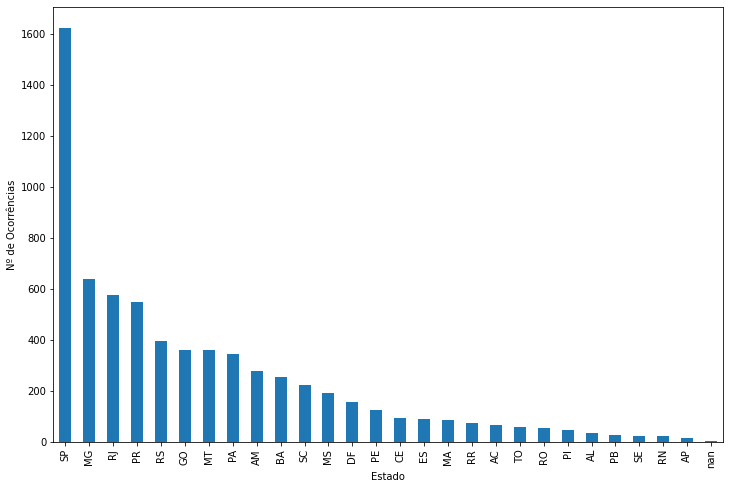

In [ ]:
df.groupby(['uf'], dropna= False).size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Estado',ylabel='Nº de Ocorrências')

<AxesSubplot:ylabel='None'>

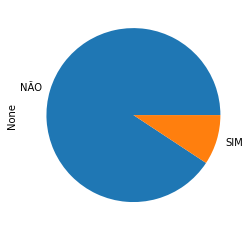

In [ ]:
# QUANDO USAR E QUANDO NÃO USAR O GRAFICO DE PIZZA:
# só se usa pra NO MÁXIMO 3 valores que não sejam muito proximos. 
df.groupby(['saida_pista'], dropna=False).size().sort_values(ascending=False).plot.pie()


In [ ]:
#dados.gov.br - site de dados do brasil para treino


## LOAD - carregamento (Salvar o DF)

In [ ]:
# Se não alterar o rótulo padrão, obrigatoriamente tem que salvar o arquivo com index False. Se alterar o index, não colocar.
# Salvar localmente:
df.to_csv('cenipa_tratado.csv', index=False)


In [ ]:
# Salvar direto no bucket:
df.to_csv('gs://larissaadami01/tratados/cenipa_tratado.csv', index=False)


In [ ]:
# SITES PARA BUSCAR DADOS:
'''
dados.gov.br
kaggle.com/datasets
'''
